In [111]:
from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt

In [112]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

In [113]:
# this is our input placeholder
input_img = Input(shape=(784,))

In [114]:
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

In [115]:
encoded = Dense(128, activation='relu')(encoded)

In [116]:
decoded = Dense(128, activation='relu')(encoded)

In [117]:
decoded = Dense(784, activation='relu')(decoded)

In [118]:
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(decoded)

In [119]:
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [120]:
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])

In [121]:
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [122]:
history = autoencoder.fit(x_train, x_train, epochs=5, batch_size=256, shuffle=True, validation_data=(x_test, x_test))


Epoch 1/5
235/235 [==============================] - 7s 31ms/step - loss: 0.6937 - accuracy: 7.8333e-04 - val_loss: 0.6937 - val_accuracy: 6.0000e-04
Epoch 2/5
235/235 [==============================] - 8s 33ms/step - loss: 0.6936 - accuracy: 8.5000e-04 - val_loss: 0.6936 - val_accuracy: 6.0000e-04
Epoch 3/5
235/235 [==============================] - 8s 35ms/step - loss: 0.6935 - accuracy: 9.0000e-04 - val_loss: 0.6935 - val_accuracy: 6.0000e-04
Epoch 4/5
235/235 [==============================] - 8s 34ms/step - loss: 0.6934 - accuracy: 9.0000e-04 - val_loss: 0.6934 - val_accuracy: 6.0000e-04
Epoch 5/5
235/235 [==============================] - 9s 38ms/step - loss: 0.6933 - accuracy: 9.6667e-04 - val_loss: 0.6933 - val_accuracy: 5.0000e-04


In [123]:
print(autoencoder.summary())

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_26 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_27 (Dense)             (None, 128)               4224      
_________________________________________________________________
dense_28 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_29 (Dense)             (None, 784)               101136    
_________________________________________________________________
dense_30 (Dense)             (None, 784)               615440    
Total params: 762,432
Trainable params: 762,432
Non-trainable params: 0
_____________________________________________________

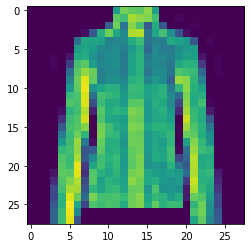

In [124]:
plt.imshow(x_test[57].reshape(28,28))

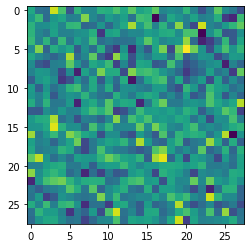

In [125]:
decoded_imgs = autoencoder.predict(x_test)
plt.imshow(decoded_imgs[57].reshape(28, 28))

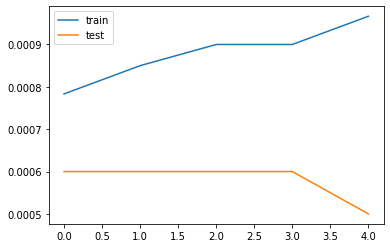

In [126]:
##ACCURACY
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

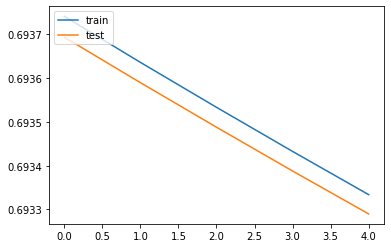

In [127]:
## LOSS
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'test'], loc='upper left')
plt.show()